# Imports


In [1]:
from utils.experiment import *
from utils.transforms import *

# ✔️ Baseline

- Basic normalization
  - normalize values between 0 and 1 because images from the different datasets have different value ranges in the images
  - equalizeHist to have a unified brightness and contrast
  - normalize mean because it normalizes statistical properties of the images and is a recommended and often used step
  - same for standardization
- warum diese reihenfolge?


In [2]:
normalization = [
    Resize((32, 64)),
    Standardize(),
    NormalizeMinMax(),
    EqualizeHist(),
    Resize((64, 128)),
]

baseline = Experiment("Baseline", normalization + [ToTensor()])


# ✔️ No Preprocessing

In [3]:
no_preprocessing = Experiment("No Preprocessing", [Resize((64, 128)), ToTensor()])

# ✔️ CLAHE

In [4]:
clahe = Experiment(
    "CLAHE",
    [
        Resize((32, 64)),
        Standardize(),
        NormalizeMinMax(),
        CLAHE(),
        Resize((64, 128)),
        ToTensor(),
    ],
)

# ✔️ Agressive Thresholding
- One could also try out different thresholding algorithms, but there was no difference in my case, but maybe in combination with other preprocessing steps it might make a difference. skimage provides a function for plotting the results of the provided thresholding algorithms

In [5]:
agressive_thresholding = Experiment(
    "Agressive Thresholding",
    [
        *normalization,
        Blur((3, 3)),
        Threshold(median_larger_zero),
        ToTensor(),
    ],
)


# ✔️ Agressive Thresholding + Sobel


In [6]:
sobel = Experiment(
    "Agressive Thresholding + Sobel",
    [
        *normalization,
        Blur((3, 3)),
        Threshold(median_larger_zero),
        Sobel(),
        Threshold(median_larger_zero),
        ToTensor(),
    ],
)


# ✔️ Rolling Ball + Agressive Thresholding


In [7]:
rolling_ball = Experiment("Rolling Ball + Agressive Thresholding",
    [
        *normalization,
        RollingBall(radius=5),
        Blur((3, 3)),
        Threshold(median_larger_zero),
        ToTensor(),
    ]
)


# ✔️ Simple denoise
- comparison to agressive thresholding and rolling ball + thresholding which noise removal methods has the best result
- try different denoise functions?

In [8]:
simple_denoise = Experiment("Simple Denoise",
    [
        *normalization,
        Denoise(),
        Threshold(median_larger_zero),
        ToTensor(),
    ]
)

# ✔️ Fourier


In [9]:
fourier = Experiment("Fourier",
    [
        *normalization,
        Denoise(),
        Blur((3, 3)),
        HighPass(rad=50),
        Blur((3, 3)),
        Threshold(median_larger_zero),
        ToTensor(),
    ]
)


# ✔️ Improving SLP

- hier zwei szenarien testen: einmal diese transformation auf beide datensätze anwenden und einmal nur auf slp und agressive thresholding oder so auf physionet
- interessante sache: später resizen behält in den schritten davor noch mehr details, womit besser preprocessed werden kann
- Potential: Menschen auf slp bildern vergrößern, damit die auf allen druckbildern ungefähr gleich groß sind


In [10]:
improve_slp = Experiment("Improve SLP",
    [
        Standardize(),
        NormalizeMinMax(),
        EqualizeHist(),
        Blur((3, 3)),
        Denoise(),
        Threshold(median_larger_zero),
        Close((3, 3), ktype=cv2.MORPH_CROSS, iterations=3),
        Blur((3, 3)),
        Resize((64, 128)),
        ToTensor(),
    ]
)


# ✔️ Radial Transform
- als preprocessing schritt mit center origin
- als data augmentation schritt mit random origin

In [11]:
radial_transform = Experiment("Radial Transform",
    [
        *normalization,
        Blur((3, 3)),
        Threshold(median_larger_zero),
        WarpPolar(),
        ToTensor(),
    ]
)


# ✔️ Radial Transform on Sobel

In [12]:
radial_transform_sobel = Experiment("Radial Transform on Sobel",
    [
        *normalization,
        Blur((3, 3)),
        Threshold(median_larger_zero),
        Sobel(),
        Threshold(median_larger_zero),
        WarpPolar(),
        ToTensor(),
    ]
)


# ✔️ Dynamic Closing
-> Future Work: Look at each segment of the image instead of the whole image at once and do local dynamic closing

In [13]:
dynamic_closing = Experiment("Dynamic Closing",
    [
        *normalization,
        Blur((3, 3)),
        Threshold(median_larger_zero),
        CloseInHoughDirection(),
        ToTensor(),
    ]
)

# ✔️ Individual Transform

In [14]:
individual_tranform = Experiment(
    "Individual Transform",
    transform=[ # Agressive Thresholding
        *normalization,
        Blur((3, 3)),
        Threshold(median_larger_zero),
        ToTensor(),
    ],
    transform_slp=[ # Improve SLP
        Standardize(),
        NormalizeMinMax(),
        EqualizeHist(),
        Blur((3, 3)),
        Denoise(),
        Threshold(median_larger_zero),
        Close((3, 3), ktype=cv2.MORPH_CROSS, iterations=3),
        Blur((3, 3)),
        Resize((64, 128)),
        ToTensor(),
    ],
)

# ✔️ Random Rotate

In [15]:
random_rotate = Experiment(
    "Random Rotate",
    [
        *normalization,
        Blur((3, 3)),
        Threshold(median_larger_zero),
        RandomRotate(30),
        ToTensor(),
    ],
)

# ✔️ Random Rotate + Zoom

In [16]:
random_rotate_zoom = Experiment(
    "Random Rotate Zoom",
    [
        *normalization,
        Blur((3, 3)),
        Threshold(median_larger_zero),
        RandomRotate(30),
        RandomZoom((128, 64)),
        ToTensor(),
    ],
)

# Evaluation

Running Experiment >>Baseline<<


Train progress: [                                 ] 0/1 Epoch: --- Loss: ------
Train progress: [                               ] 0/1 Epoch: 1/1 Loss: ↘ 1.0997
Train progress: [-------------------------------] 1/1 Epoch: 1/1 Loss: ↘ 1.0997


Reading data took 0.8s
1. Training took 0.1s
(2, 2)
1. Evaluation took 0.0s
Successfully ran Experiment >>Baseline<<
Running Experiment >>No Preprocessing<<


c:\Users\Jannis\Development\wisemat-posture-classification\utils\plots.py:14: RuntimeWarning: invalid value encountered in true_divide
  cm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]
Train progress: [                                 ] 0/1 Epoch: --- Loss: ------
Train progress: [                               ] 0/1 Epoch: 1/1 Loss: ↘ 1.7916
Train progress: [-------------------------------] 1/1 Epoch: 1/1 Loss: ↘ 1.7916


Reading data took 0.8s
1. Training took 0.1s
(2, 2)
1. Evaluation took 0.0s
Successfully ran Experiment >>No Preprocessing<<
Running Experiment >>CLAHE<<


c:\Users\Jannis\Development\wisemat-posture-classification\utils\plots.py:14: RuntimeWarning: invalid value encountered in true_divide
  cm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]
Train progress: [                                 ] 0/1 Epoch: --- Loss: ------
Train progress: [                               ] 0/1 Epoch: 1/1 Loss: ↘ 1.0978
Train progress: [-------------------------------] 1/1 Epoch: 1/1 Loss: ↘ 1.0978


Reading data took 0.8s
1. Training took 0.1s
(3, 3)
1. Evaluation took 0.0s


c:\Users\Jannis\Development\wisemat-posture-classification\utils\plots.py:14: RuntimeWarning: invalid value encountered in true_divide
  cm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]


Successfully ran Experiment >>CLAHE<<
Running Experiment >>Agressive Thresholding<<


Train progress: [                                 ] 0/1 Epoch: --- Loss: ------
Train progress: [                               ] 0/1 Epoch: 1/1 Loss: ↘ 1.0947
Train progress: [-------------------------------] 1/1 Epoch: 1/1 Loss: ↘ 1.0947


Reading data took 0.8s
1. Training took 0.1s
(3, 3)
1. Evaluation took 0.0s
Successfully ran Experiment >>Agressive Thresholding<<
Running Experiment >>Agressive Thresholding + Sobel<<


c:\Users\Jannis\Development\wisemat-posture-classification\utils\plots.py:14: RuntimeWarning: invalid value encountered in true_divide
  cm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]
Train progress: [                                 ] 0/1 Epoch: --- Loss: ------
Train progress: [                               ] 0/1 Epoch: 1/1 Loss: ↘ 1.0942
Train progress: [-------------------------------] 1/1 Epoch: 1/1 Loss: ↘ 1.0942


Reading data took 0.8s
1. Training took 0.1s
(2, 2)
1. Evaluation took 0.0s


c:\Users\Jannis\Development\wisemat-posture-classification\utils\plots.py:14: RuntimeWarning: invalid value encountered in true_divide
  cm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]


Successfully ran Experiment >>Agressive Thresholding + Sobel<<
Running Experiment >>Rolling Ball + Agressive Thresholding<<


Train progress: [                                 ] 0/1 Epoch: --- Loss: ------
Train progress: [                               ] 0/1 Epoch: 1/1 Loss: ↘ 1.1010
Train progress: [-------------------------------] 1/1 Epoch: 1/1 Loss: ↘ 1.1010


Reading data took 1.2s
1. Training took 0.1s
(3, 3)
1. Evaluation took 0.0s


c:\Users\Jannis\Development\wisemat-posture-classification\utils\plots.py:14: RuntimeWarning: invalid value encountered in true_divide
  cm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]


Successfully ran Experiment >>Rolling Ball + Agressive Thresholding<<
Running Experiment >>Simple Denoise<<


Train progress: [                                 ] 0/1 Epoch: --- Loss: ------
Train progress: [                               ] 0/1 Epoch: 1/1 Loss: ↘ 1.1072
Train progress: [-------------------------------] 1/1 Epoch: 1/1 Loss: ↘ 1.1072


Reading data took 1.6s
1. Training took 0.1s
(3, 3)
1. Evaluation took 0.0s
Successfully ran Experiment >>Simple Denoise<<
Running Experiment >>Fourier<<


c:\Users\Jannis\Development\wisemat-posture-classification\utils\plots.py:14: RuntimeWarning: invalid value encountered in true_divide
  cm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]
Train progress: [                                 ] 0/1 Epoch: --- Loss: ------
Train progress: [                               ] 0/1 Epoch: 1/1 Loss: ↘ 1.1079
Train progress: [-------------------------------] 1/1 Epoch: 1/1 Loss: ↘ 1.1079


Reading data took 1.7s
1. Training took 0.1s
(3, 3)
1. Evaluation took 0.0s


c:\Users\Jannis\Development\wisemat-posture-classification\utils\plots.py:14: RuntimeWarning: invalid value encountered in true_divide
  cm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]


Successfully ran Experiment >>Fourier<<
Running Experiment >>Improve SLP<<


Train progress: [                                 ] 0/1 Epoch: --- Loss: ------
Train progress: [                               ] 0/1 Epoch: 1/1 Loss: ↘ 1.0906
Train progress: [-------------------------------] 1/1 Epoch: 1/1 Loss: ↘ 1.0906


Reading data took 1.3s
1. Training took 0.1s
(3, 3)
1. Evaluation took 0.0s


c:\Users\Jannis\Development\wisemat-posture-classification\utils\plots.py:14: RuntimeWarning: invalid value encountered in true_divide
  cm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]


Successfully ran Experiment >>Improve SLP<<
Running Experiment >>Radial Transform<<


Train progress: [                                 ] 0/1 Epoch: --- Loss: ------
Train progress: [                               ] 0/1 Epoch: 1/1 Loss: ↘ 1.0958
Train progress: [-------------------------------] 1/1 Epoch: 1/1 Loss: ↘ 1.0958


Reading data took 0.9s
1. Training took 0.1s
(3, 3)
1. Evaluation took 0.0s


c:\Users\Jannis\Development\wisemat-posture-classification\utils\plots.py:14: RuntimeWarning: invalid value encountered in true_divide
  cm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]


Successfully ran Experiment >>Radial Transform<<
Running Experiment >>Radial Transform on Sobel<<


Train progress: [                                 ] 0/1 Epoch: --- Loss: ------
Train progress: [                               ] 0/1 Epoch: 1/1 Loss: ↘ 1.1022
Train progress: [-------------------------------] 1/1 Epoch: 1/1 Loss: ↘ 1.1022


Reading data took 0.9s
1. Training took 0.1s
(2, 2)
1. Evaluation took 0.0s


c:\Users\Jannis\Development\wisemat-posture-classification\utils\plots.py:14: RuntimeWarning: invalid value encountered in true_divide
  cm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]


Successfully ran Experiment >>Radial Transform on Sobel<<
Running Experiment >>Dynamic Closing<<


Train progress: [                                 ] 0/1 Epoch: --- Loss: ------
Train progress: [                               ] 0/1 Epoch: 1/1 Loss: ↘ 1.0973
Train progress: [-------------------------------] 1/1 Epoch: 1/1 Loss: ↘ 1.0973


Reading data took 1.0s
1. Training took 0.1s
(3, 3)
1. Evaluation took 0.0s


c:\Users\Jannis\Development\wisemat-posture-classification\utils\plots.py:14: RuntimeWarning: invalid value encountered in true_divide
  cm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]


Successfully ran Experiment >>Dynamic Closing<<
Running Experiment >>Individual Transform<<


Train progress: [                                 ] 0/1 Epoch: --- Loss: ------
Train progress: [                               ] 0/1 Epoch: 1/1 Loss: ↘ 1.0914
Train progress: [-------------------------------] 1/1 Epoch: 1/1 Loss: ↘ 1.0914


Reading data took 1.3s
1. Training took 0.1s
(3, 3)
1. Evaluation took 0.0s


c:\Users\Jannis\Development\wisemat-posture-classification\utils\plots.py:14: RuntimeWarning: invalid value encountered in true_divide
  cm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]


Successfully ran Experiment >>Individual Transform<<
Running Experiment >>Random Rotate<<


Train progress: [                                 ] 0/1 Epoch: --- Loss: ------
Train progress: [                               ] 0/1 Epoch: 1/1 Loss: ↘ 1.0957
Train progress: [-------------------------------] 1/1 Epoch: 1/1 Loss: ↘ 1.0957


Reading data took 0.9s
1. Training took 0.1s
(3, 3)
1. Evaluation took 0.0s
Successfully ran Experiment >>Random Rotate<<
Running Experiment >>Random Rotate Zoom<<


c:\Users\Jannis\Development\wisemat-posture-classification\utils\plots.py:14: RuntimeWarning: invalid value encountered in true_divide
  cm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]
Train progress: [                                 ] 0/1 Epoch: --- Loss: ------
Train progress: [                               ] 0/1 Epoch: 1/1 Loss: ↘ 1.0923
Train progress: [-------------------------------] 1/1 Epoch: 1/1 Loss: ↘ 1.0923


Reading data took 0.9s
1. Training took 0.1s
(3, 3)
1. Evaluation took 0.0s


c:\Users\Jannis\Development\wisemat-posture-classification\utils\plots.py:14: RuntimeWarning: invalid value encountered in true_divide
  cm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]


Successfully ran Experiment >>Random Rotate Zoom<<


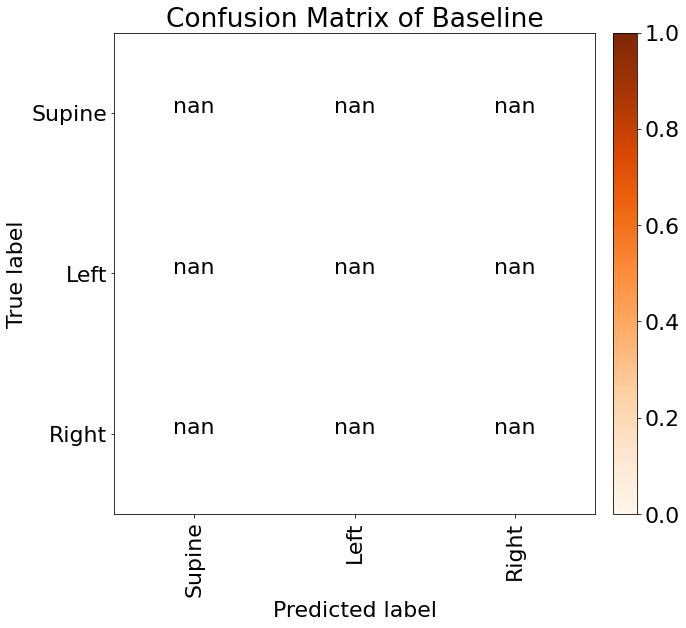

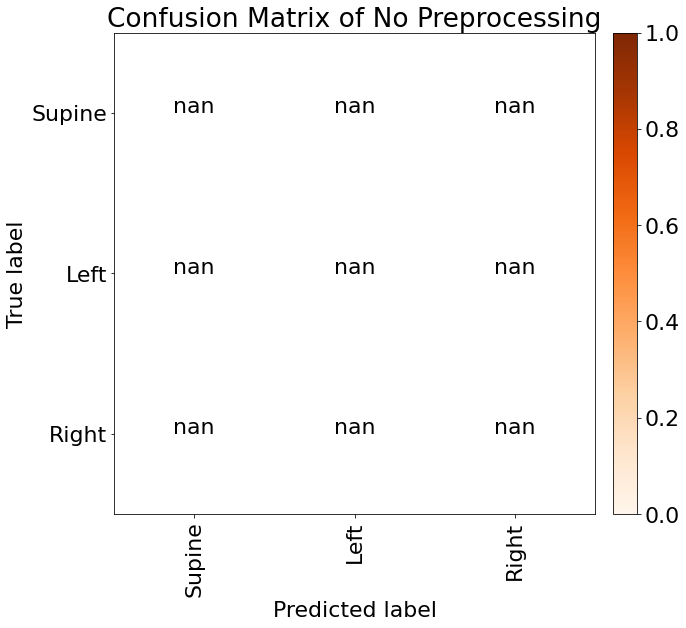

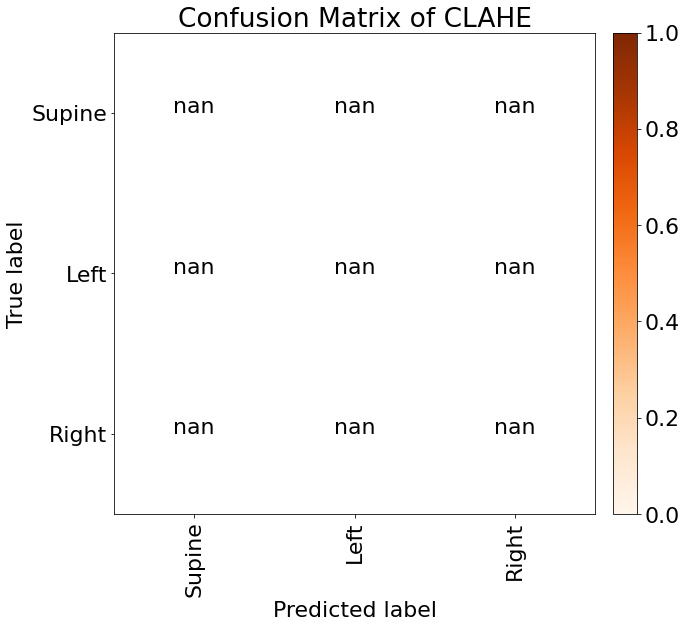

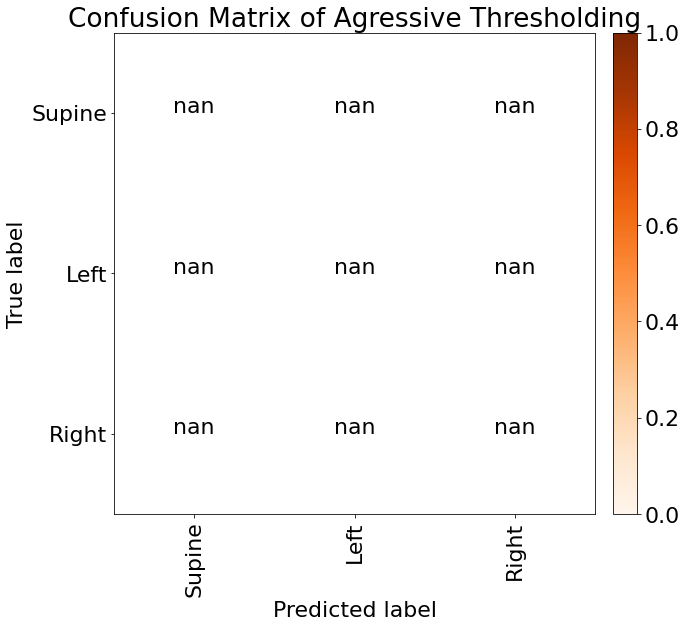

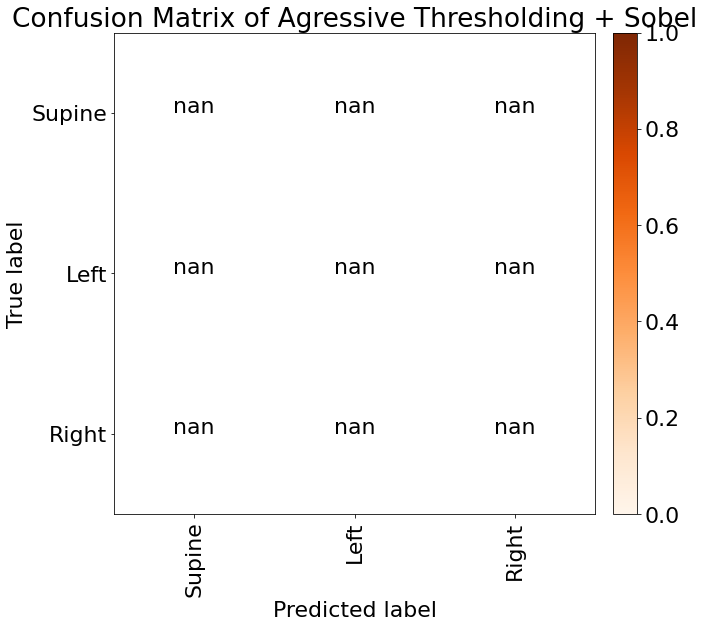

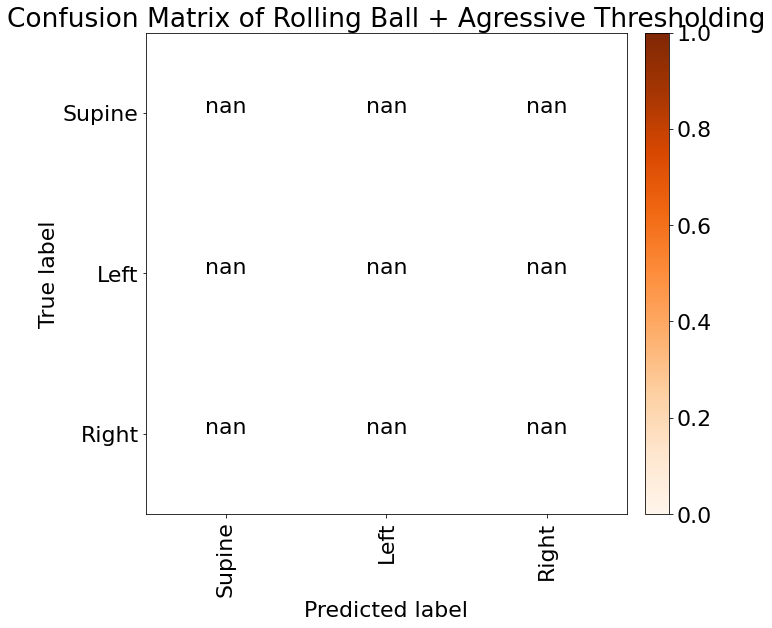

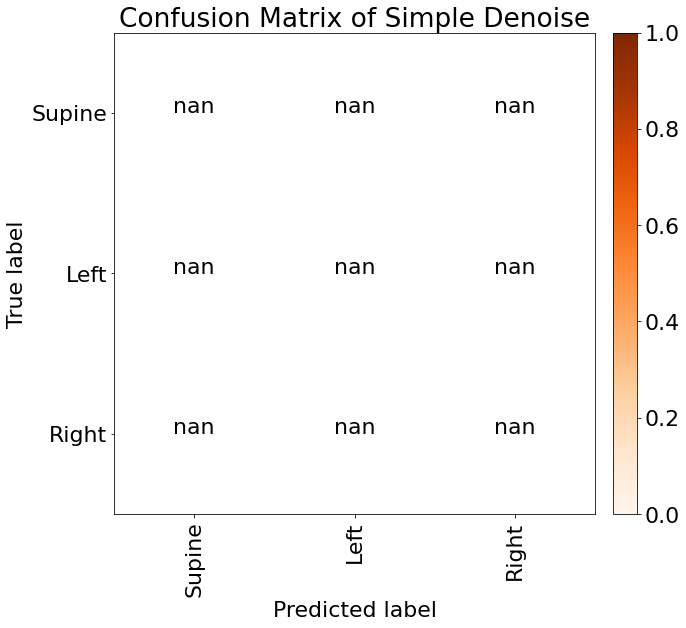

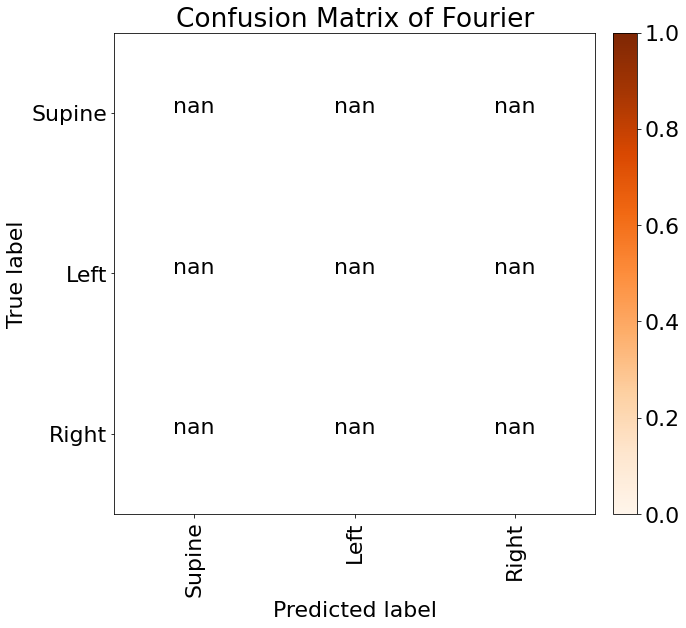

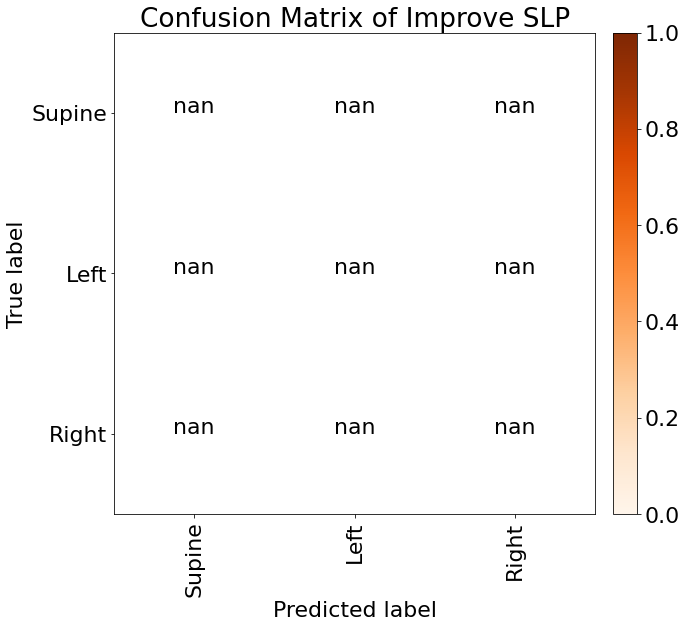

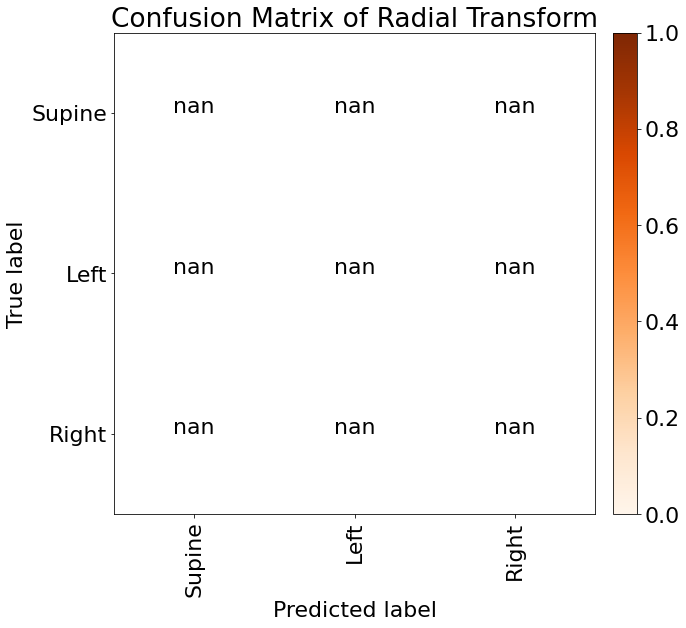

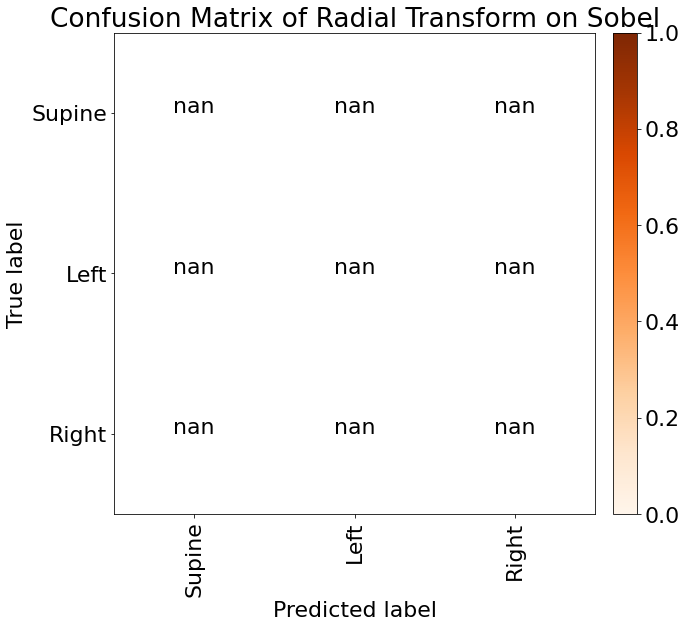

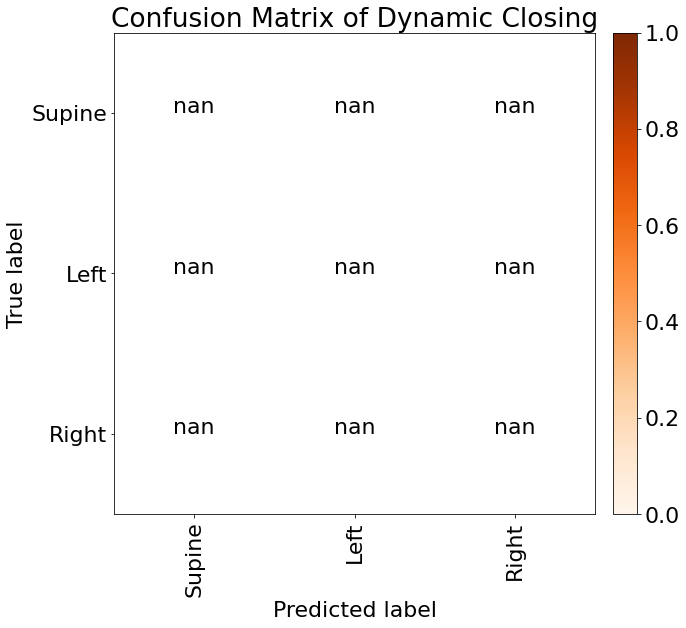

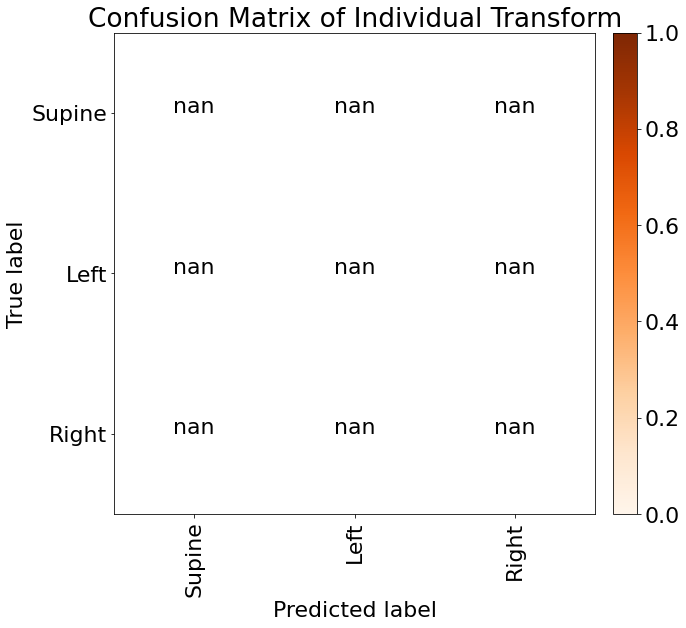

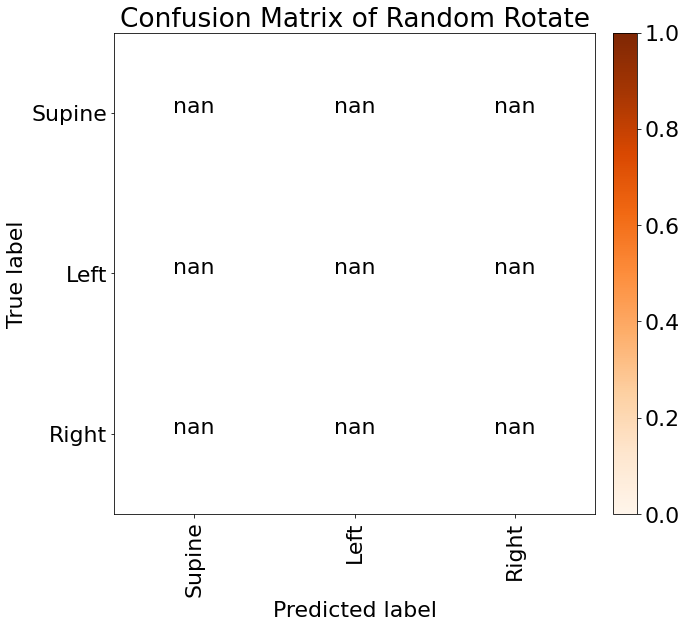

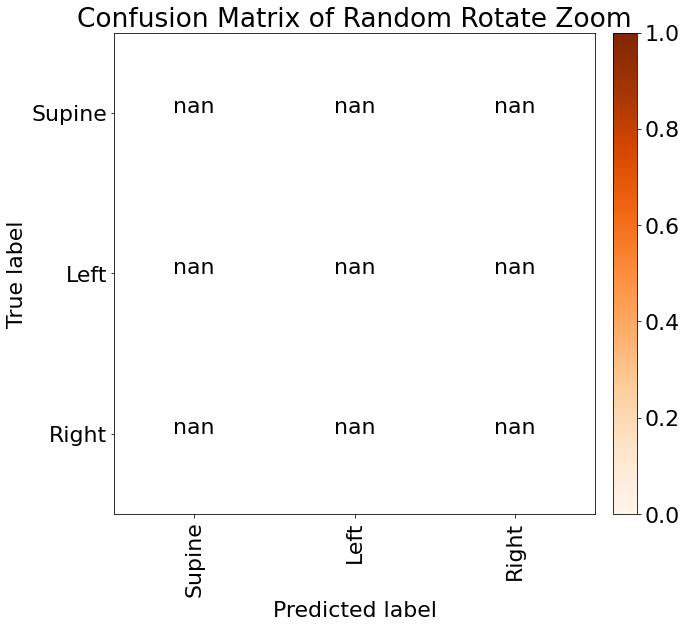

In [17]:
experiments = [baseline, no_preprocessing, clahe, agressive_thresholding, sobel, rolling_ball, simple_denoise, fourier, improve_slp, radial_transform, radial_transform_sobel, dynamic_closing, individual_tranform, random_rotate, random_rotate_zoom]

for experiment in experiments:
    experiment.run()